## Importations

In [45]:
import pandas as pd
from pmdarima import auto_arima
from pmdarima.arima import ARIMA
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

TRAINING_SAMPLES_COUNT = 900

## Chargement des données

In [32]:
data = pd.read_csv("./data/GlobalTemperatures.csv")
temp = data["LandAverageTemperature"].interpolate()[2200:]
train, test = train_test_split(temp, train_size=TRAINING_SAMPLES_COUNT)

## Recherche des meilleurs paramètres et entraînement

Paramètres du meilleur modèle :
Best model:  ARIMA(1,0,1)(1,0,1)[12] intercept

In [46]:
#model = auto_arima(train, seasonal=True, m=12, trace=True)
model = ARIMA(train, seasonal=True, p=1, d=0, q=1, m=12, trace=True)
print(str(model.summary()))

AttributeError: 'ARIMA' object has no attribute 'arima_res_'

## Prédiction

In [41]:
forecasts = model.predict(len(test))  # predict N steps into the future

/home/vincent/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/vincent/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Visualisation

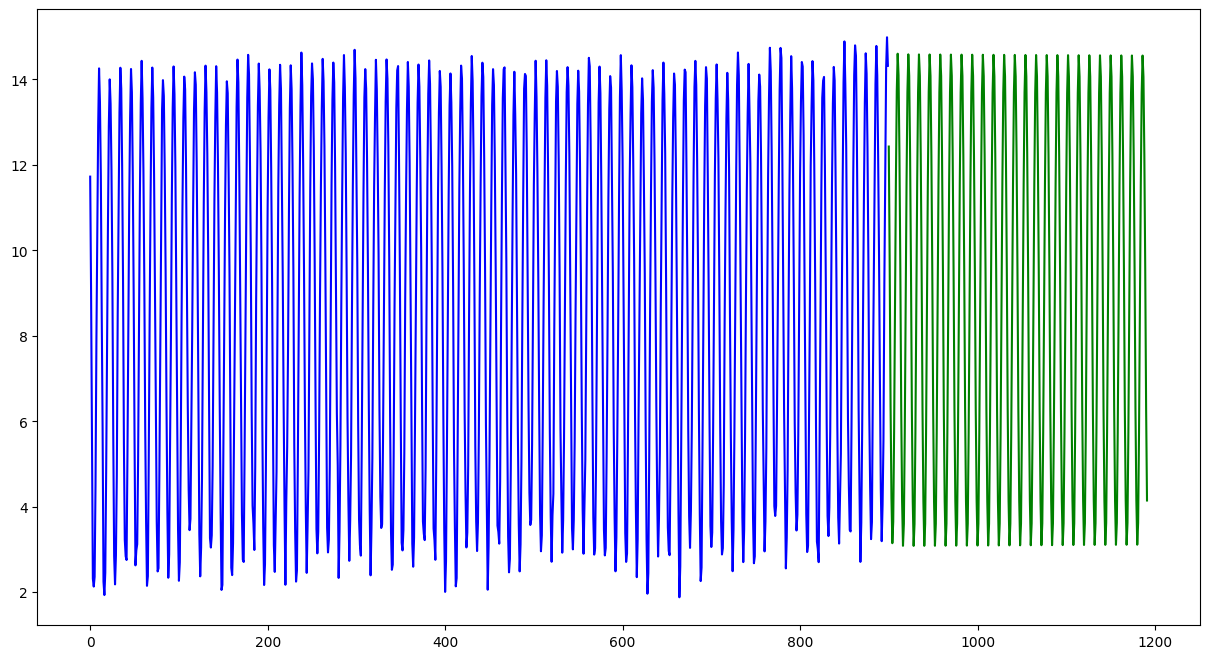

In [42]:
# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(len(temp))
plt.figure(figsize=(15,8))

plt.plot(x[:TRAINING_SAMPLES_COUNT], train, c='blue')
plt.plot(x[TRAINING_SAMPLES_COUNT:], forecasts, c='green')
plt.show()